# Setting Up Neo4j Knowledge Graph Using Docker Locally

This guide walks you through the process of running Neo4j in a Docker container locally and querying it using a Jupyter notebook.

## Prerequisites
- Docker Desktop installed on your local machine
- Python 3.x installed
- Jupyter notebook installed
- Basic knowledge of Neo4j and Cypher queries

## Step 1: Run UCKG Using Docker 
* First, pull the repository into your file system 
```bash
$  git clone https://github.com/edogdu/UCKG.git .
```

* Next, switch to root directory of project
```bash
$  cd UCKG
```

* Lastly, run docker-compose to start project (Make sure to turn on Docker Desktop before completing this step.)
```bash
$  docker-compose up --build
```

Check if UCKG is running correctly by visiting http://localhost:7474

## Step 2: Install Python Libraries for Neo4j in Jupyter
To interact with the Neo4j database in Jupyter, you'll need to install the neo4j Python driver.

```bash
$  pip install neo4j
```

## Step 3: Set Up Jupyter Notebook

* First, install Jupyter: If you haven't already, install Jupyter by running:

```bash
$  pip install jupyter
```

* Next, Create the .ipynb file: You can create a new Jupyter notebook in any directory. Run jupyter notebook in your terminal and it will open up the Jupyter interface in your browser. You can then create a new notebook

* Lastly, in the notebook, import the necessary libraries and establish a connection to the UCKG running in Docker, as shown in the example below.

In [17]:
from neo4j import GraphDatabase
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

uri = "bolt://localhost:7687"       
username = "neo4j"
password = "abcd90909090"

driver = GraphDatabase.driver(uri, auth=(username, password))

def run_query(query, parameters=None):
    with driver.session() as session:
        result = session.run(query, parameters)
        return [record.data() for record in result]


# Example query
query = """
MATCH (c:UcoCVE)-[r]->(target)
RETURN labels(c), type(r) AS Relationship
"""
params = {}

records = run_query(query, parameters=params)

df = pd.DataFrame(records)

df



,labels(c),Relationship
0,"[Resource, UcoCVE]",UCOEXHASCPE
1,"[Resource, UcoCVE]",UCOEXHASCPE
2,"[Resource, UcoCVE]",UCOEXHASCPE
3,"[Resource, UcoCVE]",UCOEXHASCPE
4,"[Resource, UcoCVE]",UCOEXHASCPE
...,...,...
30937,"[Resource, UcoCVE]",UCOEXHASCPE
30938,"[Resource, UcoCVE]",UCOEXHASCPE
30939,"[Resource, UcoCVE]",UCOEXHASCPE
30940,"[Resource, UcoCVE]",UCOEXHASCPE


## Step 4: Explore your Topic with Returend Data Using Pandas

ex 1) Distribution of relationships emerging from UcoCVE

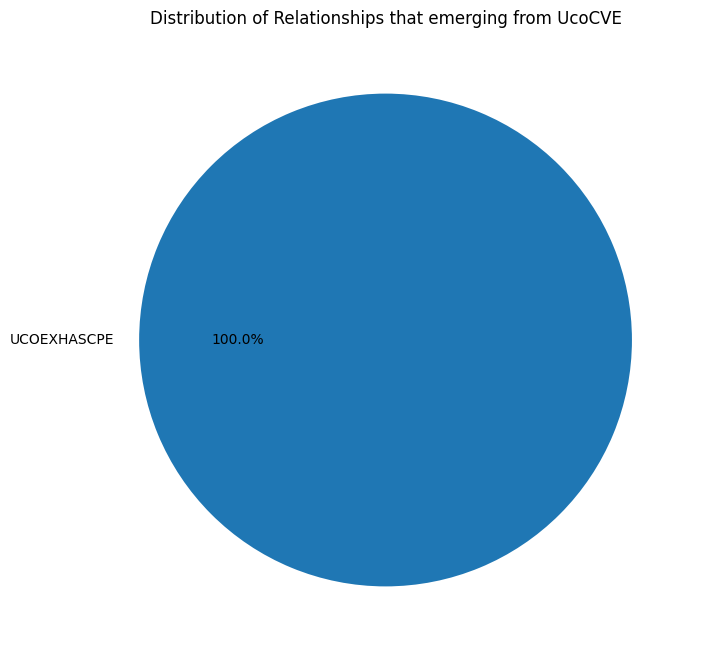

In [18]:
ax = df['Relationship'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labeldistance=1.1, figsize=(8,8))
ax.set_ylabel('')
plt.title('Distribution of Relationships that emerging from UcoCVE')
plt.show()

ex 2) Distribution of all relationships regarding UcoCVE

In [19]:
query = """
MATCH (c:UcoCVE)-[r]-(target)
RETURN labels(c), type(r) AS Relationship, target
"""
params = {}

records = run_query(query, parameters=params)

df = pd.DataFrame(records)

df

,labels(c),Relationship,target
0,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
1,"[Resource, UcoCVE]",UCOHASCVE_ID,{'ucolastModifiedDateTime': [2024-11-20T23:29:...
2,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
3,"[Resource, UcoCVE]",UCOHASCVE_ID,{'ucolastModifiedDateTime': [2024-11-20T23:30:...
4,"[Resource, UcoCVE]",UCOHASCVE_ID,{'ucolastModifiedDateTime': [2024-11-20T23:29:...
...,...,...,...
60937,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
60938,"[Resource, UcoCVE]",UCOHASCVE_ID,{'ucolastModifiedDateTime': [2024-11-21T00:42:...
60939,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
60940,"[Resource, UcoCVE]",UCOHASCVE_ID,{'ucolastModifiedDateTime': [2024-11-21T00:33:...


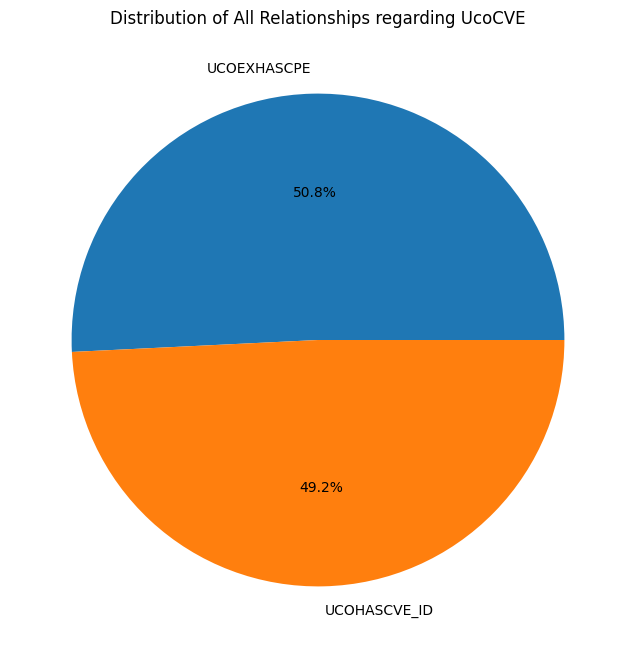

In [20]:
ax = df['Relationship'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labeldistance=1.1, figsize=(8,8))
ax.set_ylabel('')
plt.title('Distribution of All Relationships regarding UcoCVE')
plt.show()

## Step 5: Shutdown the UCKG Docker Container
Once you're done, you can shut down the Neo4j Docker container by running:

- type Ctrl+C to stop server
- use docker-compose to clean up images
```bash
$  docker-compose down
```